In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
titanic = pd.read_csv(r"C:\Users\hp\Downloads\titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Cleaning


In [3]:
titanic = titanic.drop(['PassengerId', 'SibSp','Parch','Ticket','Name','Cabin','Embarked'],axis='columns')
titanic


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [4]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [5]:
new_age = titanic.Age.median()

In [6]:
titanic['Age'] = titanic['Age'].fillna(new_age)
titanic

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,28.0,23.4500
889,1,1,male,26.0,30.0000


In [7]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
new = LabelEncoder()
new

LabelEncoder()

In [10]:
titanic['Sex_n'] = new.fit_transform(titanic['Sex'])
titanic

,Survived,Pclass,Sex,Age,Fare,Sex_n
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,1
887,1,1,female,19.0,30.0000,0
888,0,3,female,28.0,23.4500,0
889,1,1,male,26.0,30.0000,1


In [11]:
titanic = titanic.drop(['Sex'],axis ='columns')

In [12]:
titanic

,Survived,Pclass,Age,Fare,Sex_n
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,28.0,23.4500,0
889,1,1,26.0,30.0000,1


# Model Training and Evaluation


In [13]:
from sklearn.tree import DecisionTreeClassifier


In [14]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [15]:
X = titanic.drop(['Survived'],axis ='columns')
X

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,28.0,23.4500,0
889,1,26.0,30.0000,1


In [16]:
Y = titanic.Survived
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 200)

In [18]:
X_train

,Pclass,Age,Fare,Sex_n
46,3,28.0,15.5000,1
245,1,44.0,90.0000,1
86,3,16.0,34.3750,1
176,3,28.0,25.4667,1
183,2,1.0,39.0000,1
...,...,...,...,...
810,3,26.0,7.8875,1
836,3,21.0,8.6625,1
784,3,25.0,7.0500,1
617,3,26.0,16.1000,0


In [19]:
X_test

,Pclass,Age,Fare,Sex_n
659,1,58.0,113.2750,1
525,3,40.5,7.7500,1
828,3,28.0,7.7500,1
753,3,23.0,7.8958,1
518,2,36.0,26.0000,0
...,...,...,...,...
4,3,35.0,8.0500,1
610,3,39.0,31.2750,0
689,1,15.0,211.3375,0
849,1,28.0,89.1042,0


In [20]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
model.predict([[1,20.0,113.2750,1]])

array([0], dtype=int64)

# Data Visualization

<Axes: xlabel='Age', ylabel='count'>

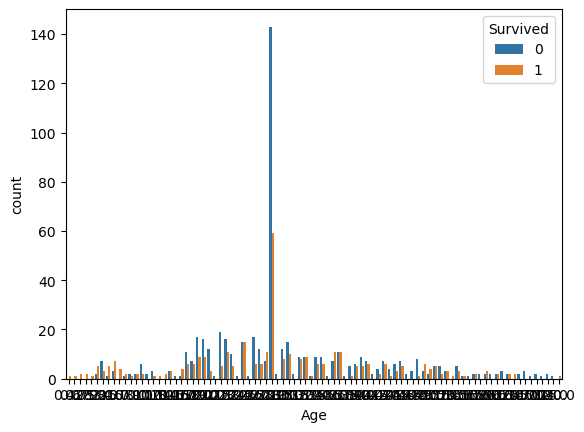

In [22]:
sns.countplot(x='Age', hue = 'Survived', data = titanic)

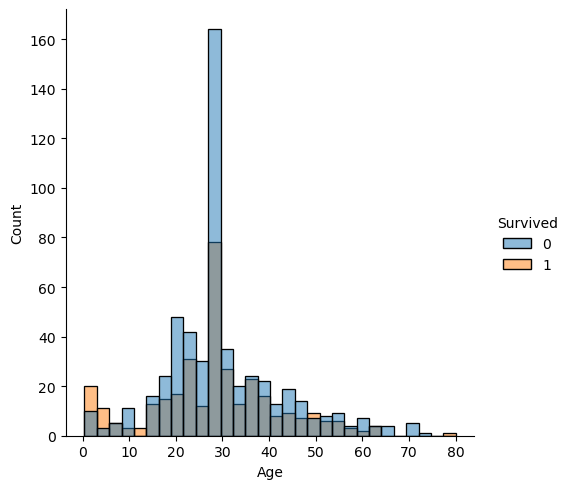

In [23]:
sns.displot(data=titanic, x='Age',hue ='Survived')


<Axes: xlabel='Age', ylabel='Survived'>

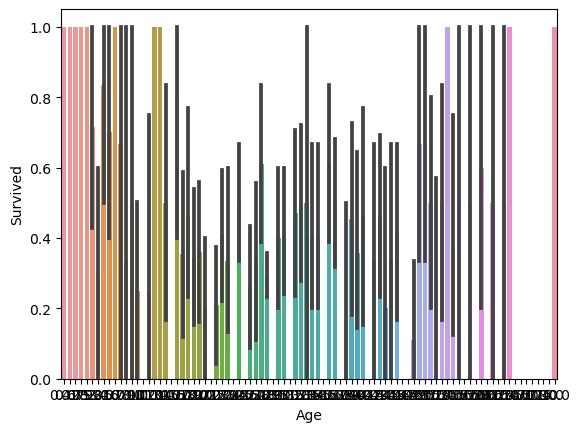

In [24]:
sns.barplot(x='Age',y='Survived',data = titanic)


<Axes: xlabel='Sex_n', ylabel='Survived'>

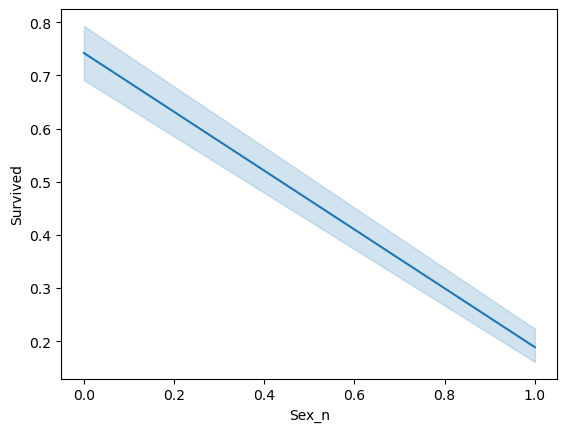

In [25]:
sns.lineplot(x='Sex_n', y ='Survived',data = titanic)

<Axes: xlabel='Sex_n', ylabel='Survived'>

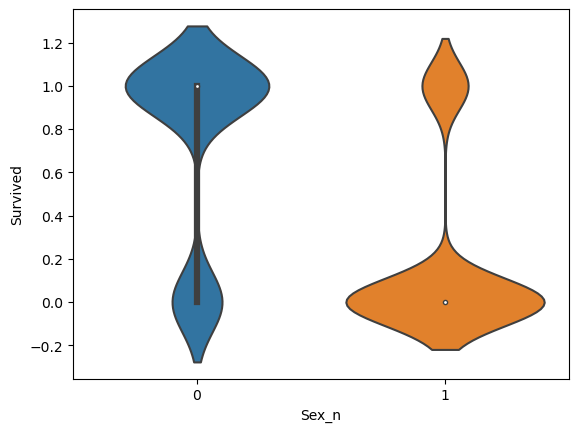

In [26]:
sns.violinplot(x='Sex_n', y ='Survived',data = titanic)

<Axes: xlabel='Sex_n', ylabel='Survived'>

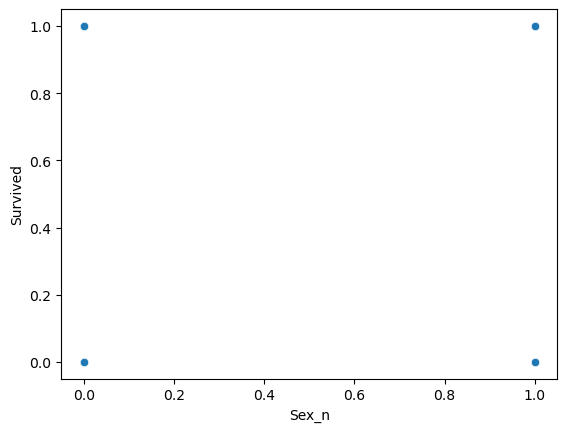

In [27]:
sns.scatterplot(x='Sex_n', y ='Survived',data = titanic)

<Axes: xlabel='Sex_n', ylabel='Survived'>

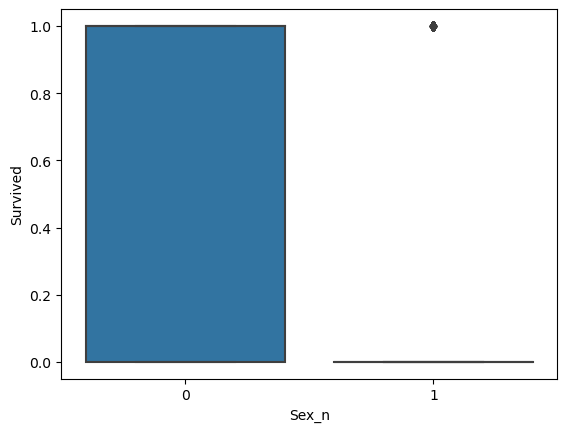

In [28]:
sns.boxplot(x='Sex_n', y ='Survived',data = titanic)

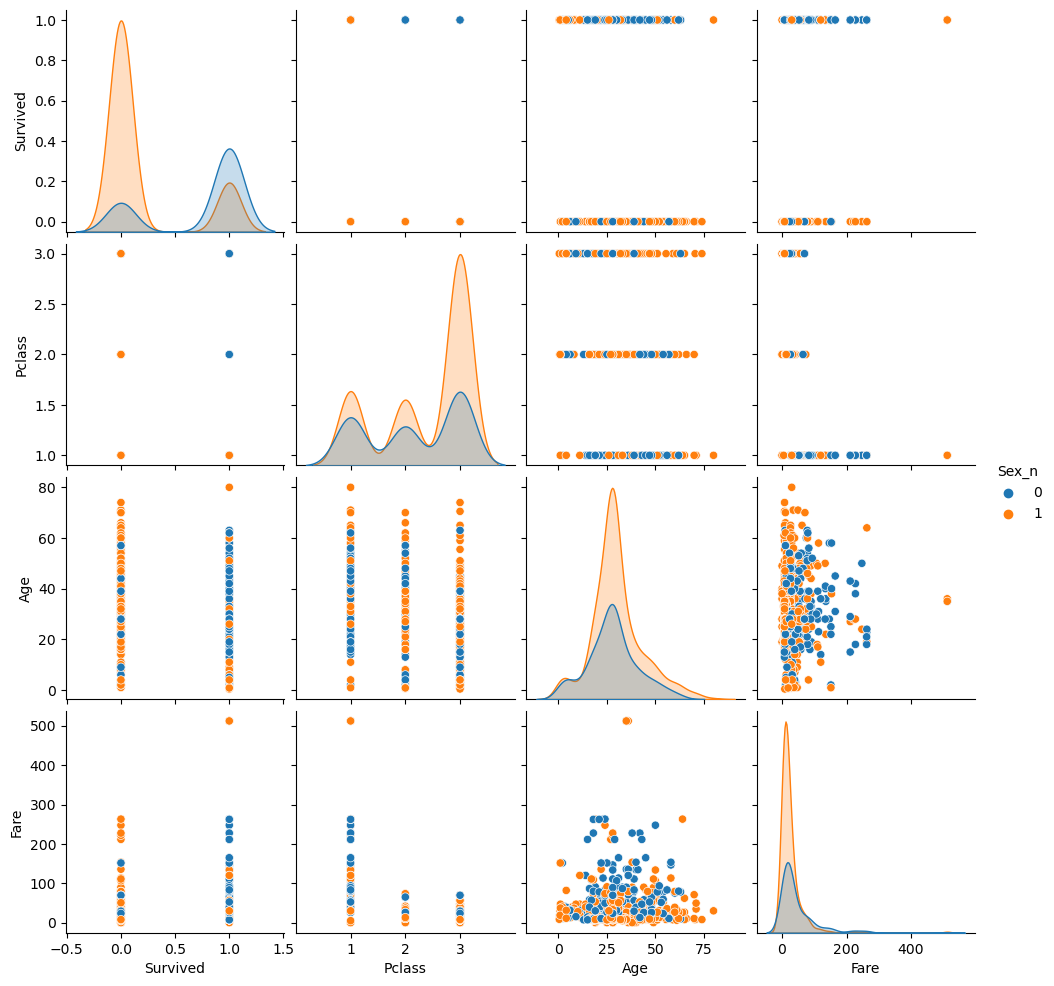

In [29]:
sns.pairplot(hue='Sex_n', data = titanic)

In [30]:
import joblib

In [31]:
joblib.dump(model,'model_s')

['model_s']

In [32]:
import pickle as pkl

In [102]:
f = joblib.load('model_s')
f

DecisionTreeClassifier()

In [103]:
 f.predict([[1,36,89.999,1]])


array([1], dtype=int64)

# Thank you